In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## ROC curve

In [2]:
#导入iris数据集
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# 二分类
X, y = X[Y != 2], Y[Y != 2]

# 使数据集更丰富，加强训练
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
# 按行链接矩阵生成新数据集
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 利用交叉验证筛选测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 用SVC类的linear核训练
svm = svm.SVC(kernel='linear', probability=True, random_state=random_state)
# 用decision_function()函数计算y_score
y_score = svm.fit(X_train, y_train).decision_function(X_test)

# 计算roc曲线的各参数
fpr,tpr,threshold = roc_curve(y_test, y_score)

<Figure size 432x288 with 0 Axes>

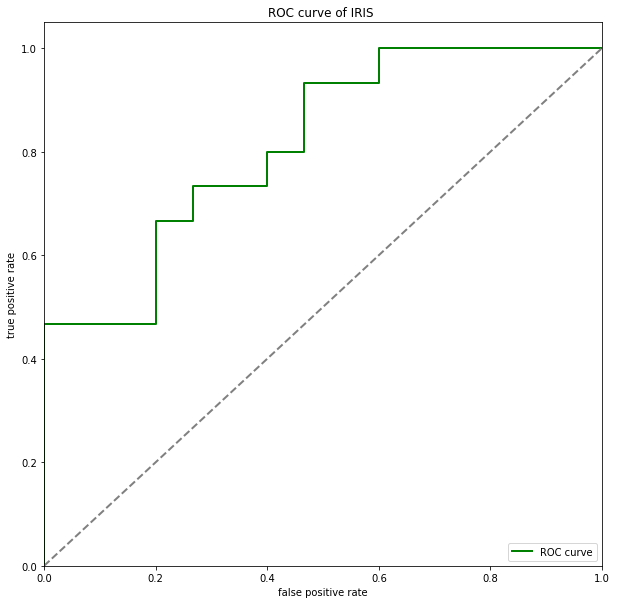

In [3]:
# 画图
plt.figure()
plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, color='green',
         linewidth=2, label='ROC curve') # fpr为横坐标，tpr为纵坐标
plt.plot([0, 1], [0, 1], color='gray', linewidth=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve of IRIS ')

plt.legend(loc="lower right")
plt.show()

## learning curve

In [4]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

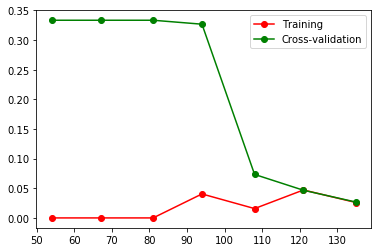

In [5]:
#导入iris数据集
iris = datasets.load_iris()
X = iris.data
Y = iris.target

train_size,train_loss,test_loss=learning_curve(
    SVC(gamma = 0.1),X, Y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=[0.4,0.5,0.6,0.7,0.8,0.9,1]
)
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)

plt.figure()
#将每一步进行打印出来
plt.plot(train_size,train_loss_mean, 'o-',color='r', label='Training')
plt.plot(train_size,test_loss_mean, 'o-',color='g', label='Cross-validation')

plt.legend()
plt.show()

## validation curve

In [6]:
from sklearn.model_selection import validation_curve

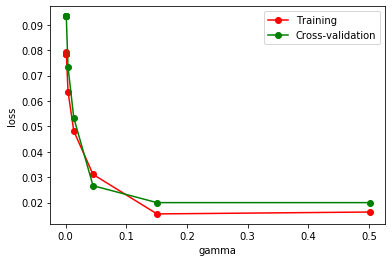

In [7]:
#引入数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

#改变param来观察Loss函数情况
param_range=np.logspace(-5,-0.3,10)
train_loss,test_loss=validation_curve(
    SVC(),X,y,param_name='gamma',param_range=param_range,cv=10,
    scoring='neg_mean_squared_error'
)

train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)

plt.figure()
plt.plot(param_range,train_loss_mean,'o-',color='r',label='Training')
plt.plot(param_range,test_loss_mean,'o-',color='g',label='Cross-validation')
plt.xlabel('gamma')
plt.ylabel('loss')
plt.legend()

plt.show()

## 交叉验证

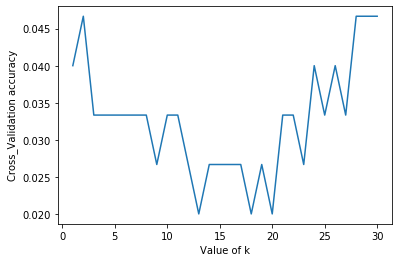

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score#引入交叉验证

iris=datasets.load_iris()
X=iris.data
y=iris.target

k_range=range(1,31)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    loss=-cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    k_score.append(loss.mean())

plt.figure()
plt.plot(k_range,k_score)
plt.xlabel('Value of k')
plt.ylabel('Cross_Validation accuracy')
plt.show()